In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

DATA PREPROCESSING

In [91]:
df = pd.read_csv('Airline_Delay_Cause.csv')
df.shape

(179338, 21)

In [ ]:
data = df.dropna()
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.00,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.00,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.00,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.00,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.00,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179333,2015,1,WN,Southwest Airlines Co.,ONT,"Ontario, CA: Ontario International",892.0,184.0,59.21,2.61,...,0.98,98.79,3.0,2.0,8431.0,2661.0,123.0,1029.0,92.0,4526.0
179334,2015,1,WN,Southwest Airlines Co.,ORF,"Norfolk, VA: Norfolk International",151.0,45.0,18.00,2.01,...,0.00,17.80,0.0,0.0,2391.0,840.0,295.0,301.0,0.0,955.0
179335,2015,1,WN,Southwest Airlines Co.,PBI,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",251.0,68.0,25.17,0.08,...,0.00,27.83,6.0,0.0,3405.0,1003.0,9.0,534.0,0.0,1859.0
179336,2015,1,WN,Southwest Airlines Co.,PDX,"Portland, OR: Portland International",793.0,173.0,64.00,1.27,...,0.00,86.60,0.0,1.0,7479.0,2370.0,143.0,689.0,0.0,4277.0


UNIVARIATE ANALYSIS

In [ ]:
#Checking unique values
indexed = data.iloc[:,0:6]
indexed.nunique()

year              9
month            12
carrier          29
carrier_name     39
airport         393
airport_name    417
dtype: int64

In [102]:
data.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,178747.000000,178747.000000,178747.000000,178747.000000,178747.000000,178747.000000,178747.000000,178747.000000,178747.000000,178747.000000,178747.000000,178747.000000,178747.000000,178747.000000,178747.000000,178747.000000,178747.000000
mean,2019.478604,6.488411,328.263244,58.709086,18.598619,2.038589,17.118839,0.145511,20.807539,6.827555,0.780545,3868.713998,1327.400141,209.405898,821.096086,6.849508,1503.955406
std,2.412093,3.464885,931.575550,164.378035,47.417686,6.899212,56.315314,0.702619,64.953490,41.471159,3.492814,11909.596123,4070.328372,792.332527,3180.677510,40.467958,4881.265039
min,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,3.000000,41.000000,6.000000,1.970000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,290.000000,91.000000,0.000000,28.000000,0.000000,55.000000
50%,2020.000000,6.000000,89.000000,15.000000,5.420000,0.220000,3.310000,0.000000,4.300000,1.000000,0.000000,903.000000,322.000000,12.000000,124.000000,0.000000,287.000000
75%,2022.000000,10.000000,218.000000,40.000000,14.730000,1.630000,9.880000,0.000000,13.040000,3.000000,1.000000,2552.000000,988.000000,131.000000,401.500000,0.000000,966.000000
max,2023.000000,12.000000,21977.000000,4176.000000,1293.910000,266.420000,1884.420000,58.690000,2069.070000,4951.000000,160.000000,438783.000000,196944.000000,31960.000000,112018.000000,3760.000000,227959.000000


In [194]:
#No. of delays caused 
desc = data.iloc[:, 8:15]
mean_delays = desc.mean()
medianDelay = desc.median()

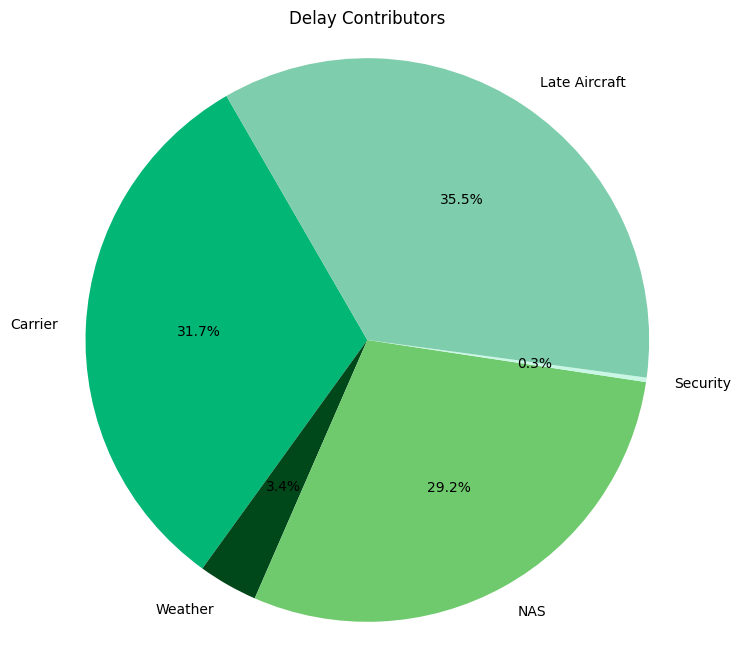

In [195]:
# Contribution in delays
labels = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']
sizes = [18.6, 2.0, 17.1, 0.15, 20.8]

# List of custom colors in hex or named colors
custom_colors = ["#02b676", "#004719", "#6FCA6D", "#C9F7E6", "#7ECDAD"]

plt.figure(figsize=(8,8))
plt.pie(
    sizes,
    labels=labels,
    colors=custom_colors,   # Pass your custom colors here
    autopct='%1.1f%%',
    startangle=120
)

plt.title('Delay Contributors')
plt.axis('equal')  # Equal aspect ratio to make it a circle
plt.show()



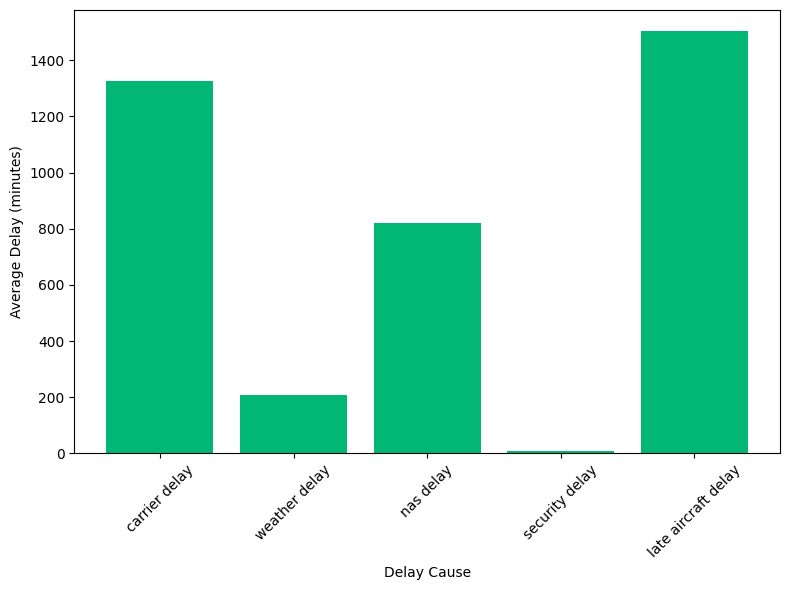

In [145]:
#Delay in minutes by causes
des = data.iloc[:, 16:]
des.mean()


# Replace with your actual series if you have it in Python already:
mean_delays = {
    'carrier delay': 1327.4,
    'weather delay': 209.4,
    'nas delay': 821.1,
    'security delay': 6.85,
    'late aircraft delay': 1504.0
}

labels = list(mean_delays.keys())
values = list(mean_delays.values())

plt.figure(figsize=(8,6))
bars = plt.bar(labels, values, color='#02b676')

# Add labels and title
plt.ylabel('Average Delay (minutes)')
plt.xlabel('Delay Cause')

# Rotate x-tick labels for readability
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


<Axes: ylabel='arr_delay'>

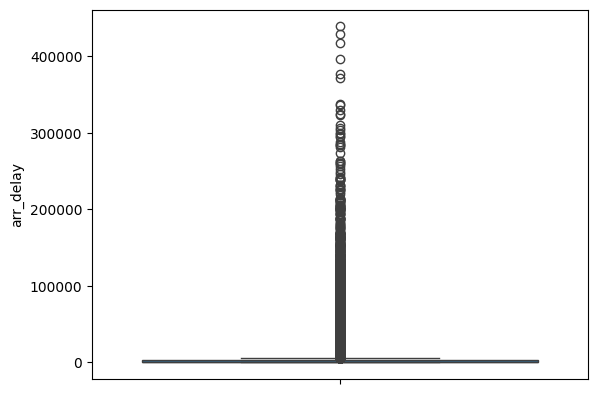

In [108]:
#Flight delay distribution in minutes
import matplotlib.pyplot as plt
sns.boxplot(df["arr_delay"])

In [ ]:
data["arr_delay"].skew()

np.float64(3.782964585332031)

In [179]:
# Calculate the quartiles
Q1 = data["arr_delay"].quantile(0.25)
Q3 = data["arr_delay"].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the upper and lower boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = data[(data["arr_delay"] < lower_bound) | (data["arr_delay"] > upper_bound)]
print("Outliers: \n", outliers)

Outliers: 
         year  month carrier            carrier_name airport  \
4       2023     12      9E       Endeavor Air Inc.     ATL   
36      2023     12      9E       Endeavor Air Inc.     DTW   
60      2023     12      9E       Endeavor Air Inc.     JFK   
64      2023     12      9E       Endeavor Air Inc.     LGA   
77      2023     12      9E       Endeavor Air Inc.     MSP   
...      ...    ...     ...                     ...     ...   
179327  2015      1      WN  Southwest Airlines Co.     STL   
179328  2015      1      WN  Southwest Airlines Co.     TPA   
179333  2015      1      WN  Southwest Airlines Co.     ONT   
179336  2015      1      WN  Southwest Airlines Co.     PDX   
179337  2015      1      WN  Southwest Airlines Co.     PHL   

                                             airport_name  arr_flights  \
4       Atlanta, GA: Hartsfield-Jackson Atlanta Intern...       2111.0   
36                Detroit, MI: Detroit Metro Wayne County       1371.0   
60       

/var/folders/jf/5mxyqy1n3n117dbydykzfb3h0000gn/T/ipykernel_38844/1190958824.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["arr_delay"])
/var/folders/jf/5mxyqy1n3n117dbydykzfb3h0000gn/T/ipykernel_38844/1190958824.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data["arr_delay"

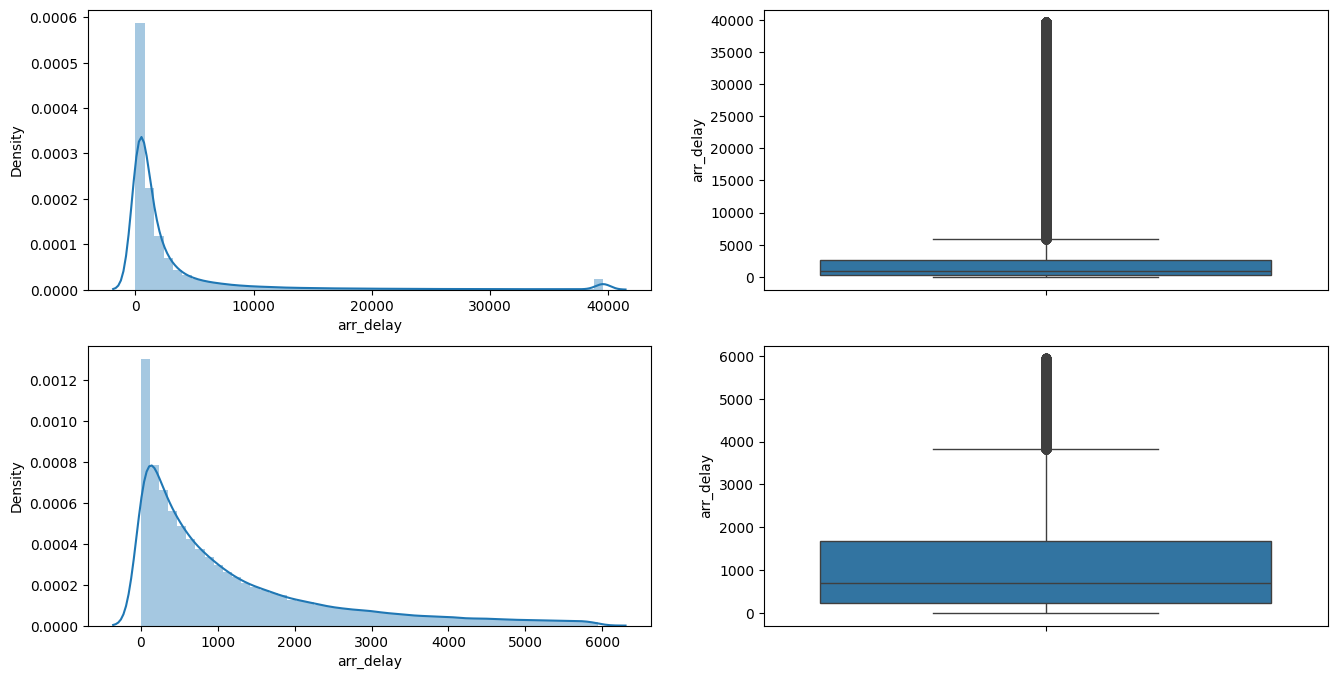

In [187]:
new_data = data[(data["arr_delay"] > lower_bound) & (data["arr_delay"] < upper_bound)]

plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
sns.distplot(data["arr_delay"])

plt.subplot(2, 2, 2)
sns.boxplot(data["arr_delay"])

plt.subplot(2, 2, 3)
sns.distplot(new_data["arr_delay"])

plt.subplot(2, 2, 4)
sns.boxplot(new_data["arr_delay"])

plt.show()

In [ ]:
#Capping the Outliers
new_data2 = data.copy()
new_data2["arr_delay"] = np.where(data["arr_delay"]>upper_bound,
         upper_bound, 
         np.where(data["arr_delay"]<lower_bound,lower_bound, data["arr_delay"]))
         
         
new_data2["arr_delay"].describe()

count    178747.000000
mean       1777.015849
std        1984.657663
min           0.000000
25%         290.000000
50%         903.000000
75%        2552.000000
max        5945.000000
Name: arr_delay, dtype: float64

In [175]:
# Calculate the boundary values
highest_allowed = data["arr_delay"].mean() + 3 * data["arr_delay"].std()
lowest_allowed = 15

# Capping the outliers
upper_limit = data["arr_delay"].mean() + 3 * data["arr_delay"].std()
lower_limit = data["arr_delay"].mean() - 3 * data["arr_delay"].std()

data["arr_delay"] = np.where(data["arr_delay"] > upper_limit, upper_limit, 
                                        np.where(data["arr_delay"] < lower_limit, lower_limit, data["arr_delay"]))

/var/folders/jf/5mxyqy1n3n117dbydykzfb3h0000gn/T/ipykernel_38844/40552445.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["arr_delay"] = np.where(data["arr_delay"] > upper_limit, upper_limit,


In [153]:
volume_delay = data.groupby('year_month').agg(
    flight_volume=('arr_flights', 'count'),
    avg_delay=('arr_delay', 'mean')
).reset_index()

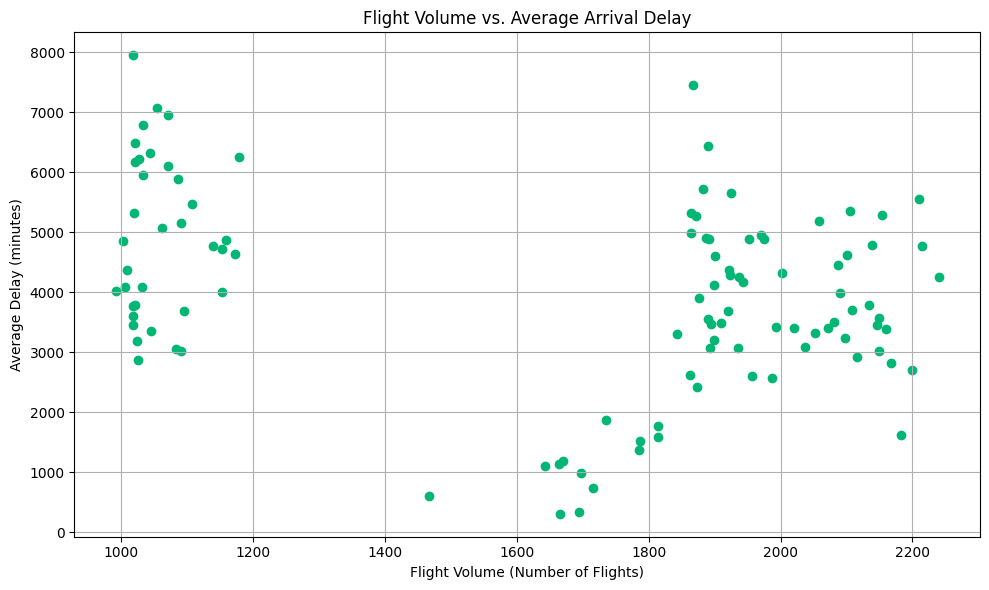

In [156]:
coeffs = np.polyfit(volume_delay['flight_volume'], volume_delay['avg_delay'], 1)
trendline = np.poly1d(coeffs)

plt.figure(figsize=(10,6))
plt.scatter(volume_delay['flight_volume'], volume_delay['avg_delay'], color='#02b676')
plt.title("Flight Volume vs. Average Arrival Delay")
plt.xlabel("Flight Volume (Number of Flights)")
plt.ylabel("Average Delay (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/jf/5mxyqy1n3n117dbydykzfb3h0000gn/T/ipykernel_38844/11606991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_month'] = pd.to_datetime(data[['year', 'month']].assign(day=1))


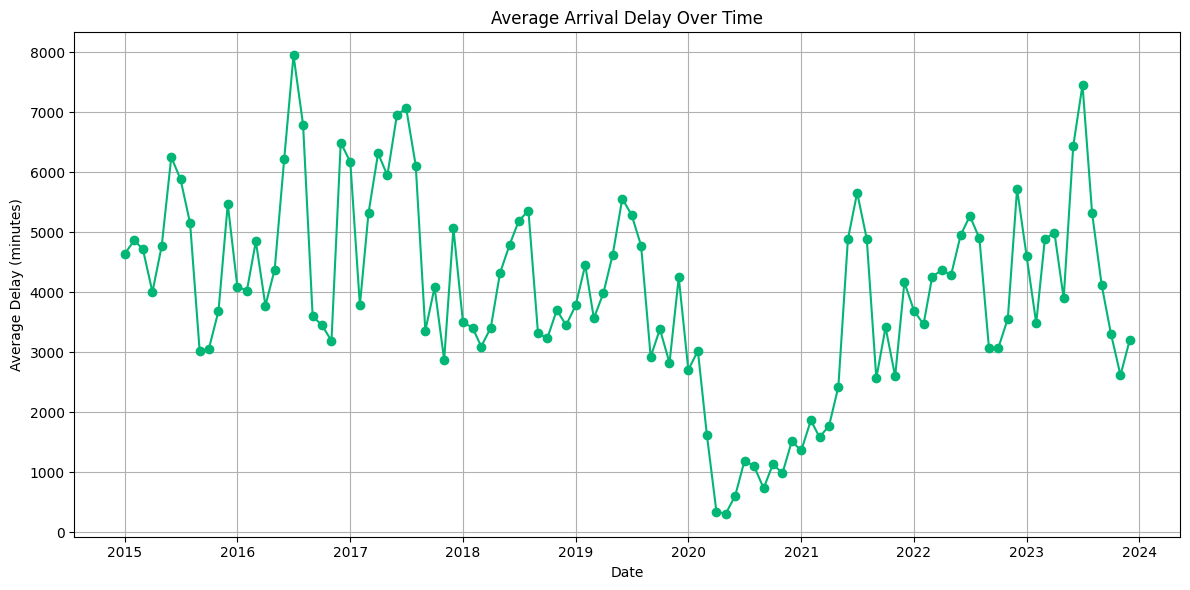

In [152]:
# Example: average delay per month-year
# Assuming you have 'year', 'month', and 'arr_delay' columns
data['year_month'] = pd.to_datetime(data[['year', 'month']].assign(day=1))
monthly_avg_delay = data.groupby('year_month')['arr_delay'].mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_avg_delay.index, monthly_avg_delay.values, marker='o', color = '#02b676')
plt.title("Average Arrival Delay Over Time")
plt.xlabel("Date")
plt.ylabel("Average Delay (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [89]:
#Top 5 Airports from which flights are delayed the most
data.groupby('airport_name')['arr_flights'].sum()
meanAirportDelay = (
    data.groupby('airport_name')['arr_del15']
    .mean()
    .sort_values(ascending=False)
    )
meanAirportDelay.head()

airport_name
Chicago, IL: Chicago O'Hare International                 330.688874
Dallas/Fort Worth, TX: Dallas/Fort Worth International    330.160000
Denver, CO: Denver International                          313.794811
Atlanta, GA: Hartsfield-Jackson Atlanta International     306.342068
Los Angeles, CA: Los Angeles International                276.534902
Name: arr_del15, dtype: float64

In [90]:
#Top 5 Carriers to cause delays
data.groupby('carrier')['arr_flights'].sum()
meanCarrierDelay = (
    data.groupby('carrier')['arr_del15']
    .mean()
    .sort_values(ascending=False)
    )
meanCarrierDelay.head()

carrier
WN    211.627798
AA    131.368696
UA     88.228668
B6     87.318968
US     84.214286
Name: arr_del15, dtype: float64

In [86]:
#Top 5 months in which flights are delayed the most
data.groupby('month')['arr_flights'].sum()
meanMonthDelay = (
    data.groupby('month')['arr_del15']
    .mean()
    .sort_values(ascending=False)
    )
meanMonthDelay.head()

month
7     77.105596
6     73.120630
8     69.921690
12    63.412657
5     57.380923
Name: arr_del15, dtype: float64

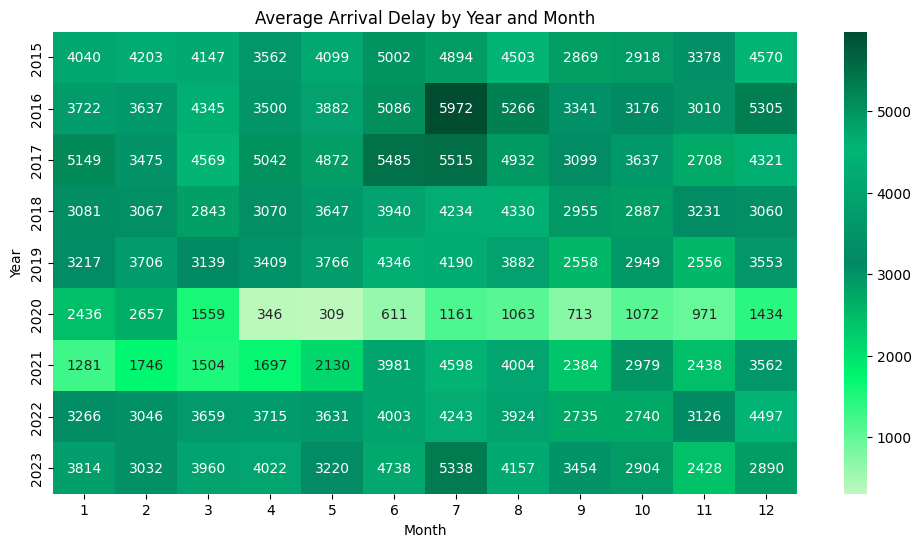

In [209]:
from matplotlib.colors import LinearSegmentedColormap
# 1) Group by year & month, calculate mean delay
pivot = data.pivot_table(
    index='year',
    columns='month',
    values='arr_delay',
    aggfunc='mean'
)
custom_cmap = LinearSegmentedColormap.from_list(
    "my_cmap", ["#bdf8bd", "#00f76f", "#028963", "#02b676", "#014d32"]  
)
# 2) Plot heatmap
plt.figure(figsize=(12,6), facecolor="#ffffff00")
sns.heatmap(pivot, annot=True, fmt=".0f", cmap=custom_cmap)
plt.title("Average Arrival Delay by Year and Month")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


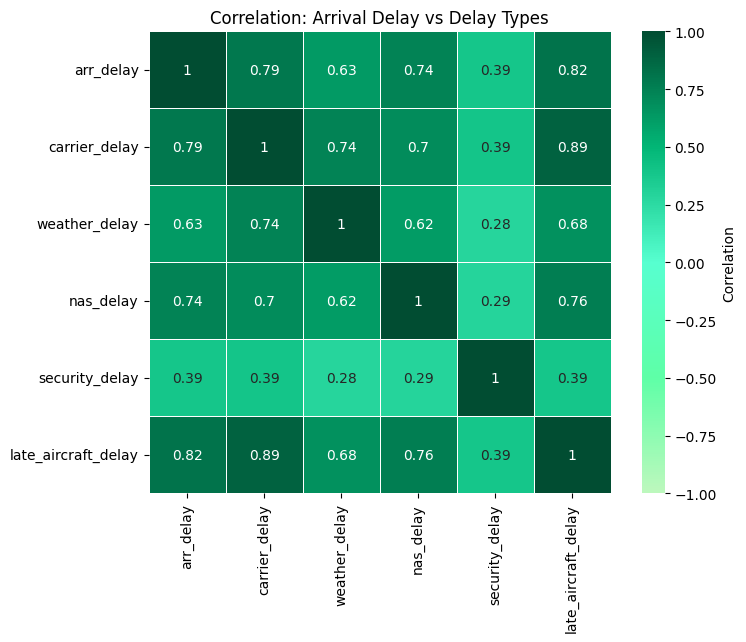

In [ ]:
cols_of_interest = [
    "arr_delay", 
    "carrier_delay", 
    "weather_delay", 
    "nas_delay", 
    "security_delay", 
    "late_aircraft_delay"
]
corr_matrix = data[cols_of_interest].corr()

custom_cmap = LinearSegmentedColormap.from_list(
    "my_cmap", ["#bdf8bd", "#5effa7", "#57FFD0", "#02b676", "#014d32"]  
)

plt.figure(figsize=(8,6), facecolor="#ffffff00")
sns.heatmap(
    corr_matrix, 
    annot=True,        # show correlation coefficients
    cmap=custom_cmap,
    vmin=-1, vmax=1,   # fix scale for better comparison
    square=True,       # square cells
    linewidths=0.5,    # thin lines between cells
    cbar_kws={"label": "Correlation"}
)
plt.title("Correlation: Arrival Delay vs Delay Types")
plt.show()


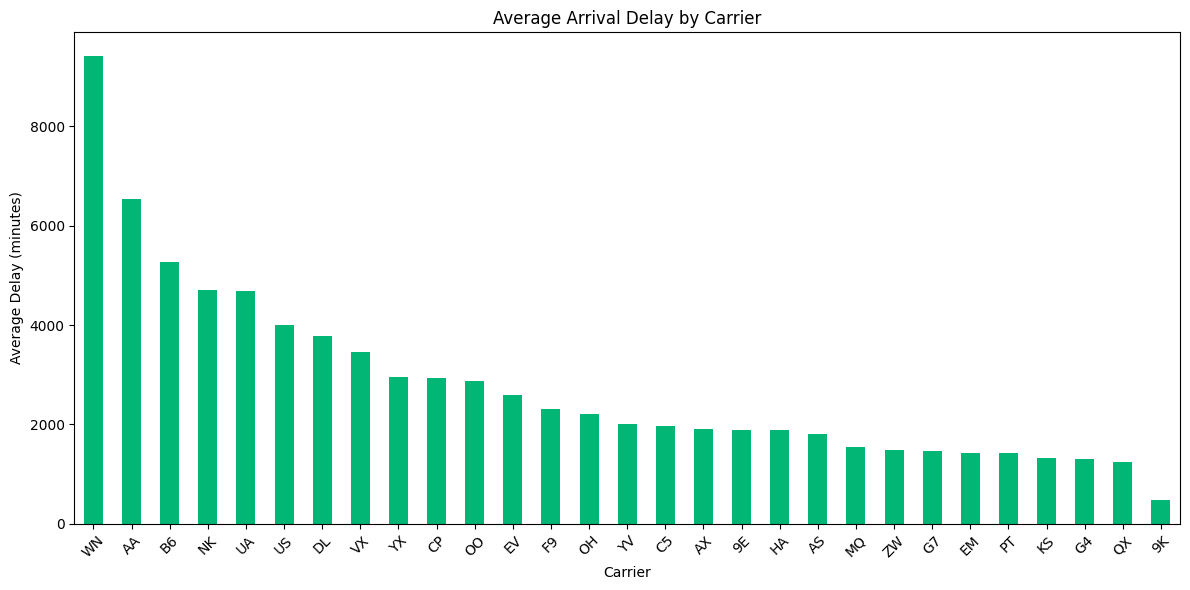

In [211]:
carrier_delays = data.groupby("carrier")["arr_delay"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6), facecolor="#ffffff00")
carrier_delays.plot(kind="bar", color="#02b676")
plt.title("Average Arrival Delay by Carrier")
plt.ylabel("Average Delay (minutes)")
plt.xlabel("Carrier")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


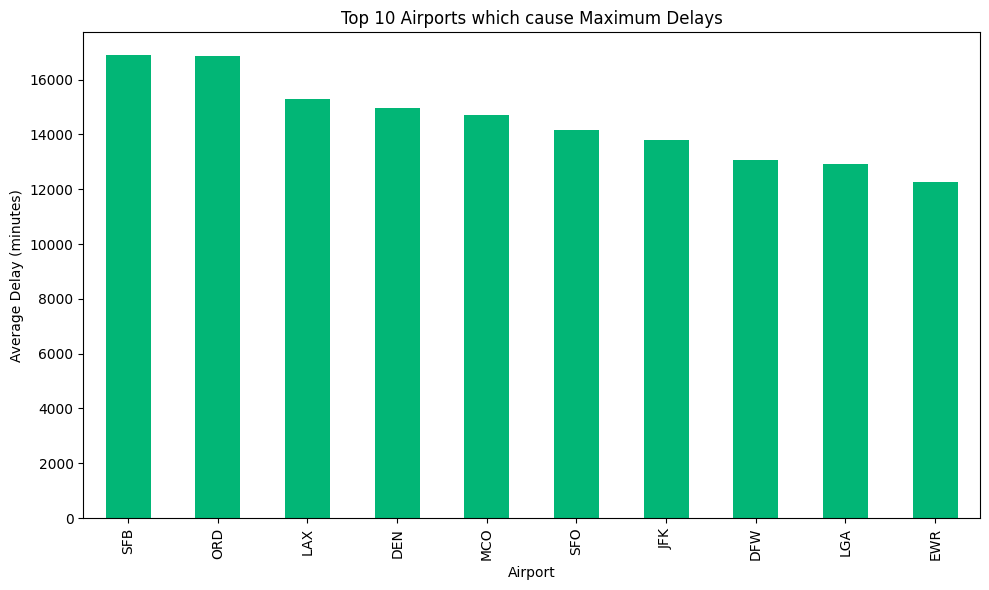

In [220]:
airport_delays = data.groupby("airport")["arr_delay"].mean().sort_values(ascending=False)
top = airport_delays.head(10)

plt.figure(figsize=(10,6), facecolor="#ffffff00")
top.plot(kind="bar", color="#02b676")
plt.title("Top 10 Airports which cause Maximum Delays")
plt.ylabel("Average Delay (minutes)")
plt.xlabel("Airport")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
